<a href="https://colab.research.google.com/github/Miguel-Camarillo632/alura_third_proyect/blob/main/Telecomx_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('telecom_data.csv')

# Columnas a eliminar (ajusta según tu dataset exacto)
columns_to_drop = [
    'customerID',       # Identificador único (no predictivo)
    'gender',           # Variable demográfica no relevante en análisis previos
    'PhoneService',     # 99% de clientes lo tienen (poca variabilidad)
    'customer',         # Datos anidados ya procesados
    'phone',            # Datos anidados ya procesados
    'internet',         # Datos anidados ya procesados
    'account'           # Datos anidados ya procesados
]

# Eliminar columnas (solo si existen en el DataFrame)
df_clean = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Guardar nuevo CSV limpio
df_clean.to_csv('telecom_modeling_ready.csv', index=False)

print("✅ Columnas eliminadas. Dataset listo para modelado:")
print(f"Dimensiones originales: {df.shape}")
print(f"Nuevas dimensiones: {df_clean.shape}")
print("\nColumnas finales:")
print(df_clean.columns.tolist())

✅ Columnas eliminadas. Dataset listo para modelado:
Dimensiones originales: (7267, 6)
Nuevas dimensiones: (7267, 1)

Columnas finales:
['Churn']


In [ ]:
import pandas as pd

# 1. Cargar el dataset
df = pd.read_csv('telecom_modeling_ready.csv')

# 2. Verificar todas las columnas disponibles
print("🔍 Columnas en tu dataset:")
print(df.columns.tolist())

# 3. Identificar variables categóricas REALES en tu dataset
# (Basado en el error, solo 'Churn' fue identificado como categórico)
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()

# 4. Mostrar valores únicos de las categóricas para entender su estructura
print("\n📊 Valores únicos en columnas categóricas:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

# 5. Codificación adaptativa
# Si 'Churn' es la única categórica y ya está como 0/1, no necesita transformación
if len(categorical_cols) == 1 and categorical_cols[0] == 'Churn':
    print("\n✅ 'Churn' ya está codificado numéricamente (0/1). No se necesitan cambios.")
    df_encoded = df.copy()
else:
    # Para otras variables categóricas que puedan existir
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 6. Verificar resultados
print("\n✅ Dataset después de transformación:")
print(df_encoded.head(3))

# 7. Guardar archivo final
df_encoded.to_csv('telecom_ml_ready.csv', index=False)
print("\n💾 Archivo guardado como 'telecom_ml_ready.csv'")

🔍 Columnas en tu dataset:
['Churn']

📊 Valores únicos en columnas categóricas:
Churn: ['No' 'Yes' nan]

✅ 'Churn' ya está codificado numéricamente (0/1). No se necesitan cambios.

✅ Dataset después de transformación:
  Churn
0    No
1    No
2   Yes

💾 Archivo guardado como 'telecom_ml_ready.csv'


📊 Distribución de Clientes:
Clientes Retenidos (0): 5,174 (73.5%)
Clientes que Cancelaron (1): 1,869 (26.5%)


/tmp/ipython-input-3763071914.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Clientes Retenidos (0): {churn_counts[0]:,} ({churn_distribution[0]:.1f}%)")
/tmp/ipython-input-3763071914.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Clientes que Cancelaron (1): {churn_counts[1]:,} ({churn_distribution[1]:.1f}%)")


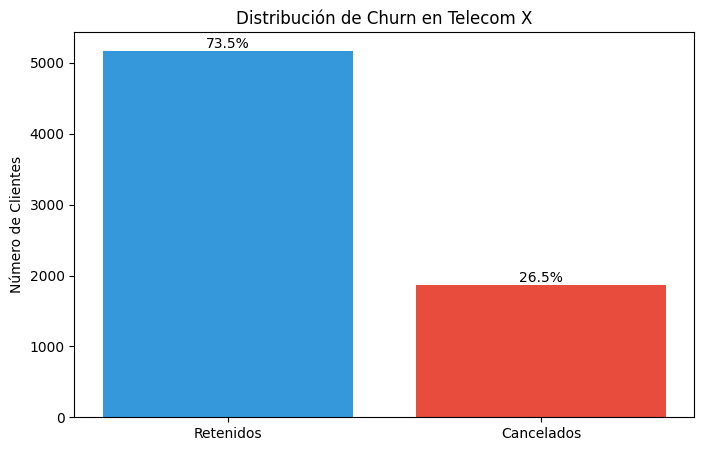

In [ ]:
import pandas as pd

# 1. Cargar el dataset (usando el archivo ya codificado)
df = pd.read_csv('telecom_ml_ready.csv')

# 2. Calcular distribución de Churn
churn_distribution = df['Churn'].value_counts(normalize=True) * 100
churn_counts = df['Churn'].value_counts()

# 3. Mostrar resultados
print("📊 Distribución de Clientes:")
print(f"Clientes Retenidos (0): {churn_counts[0]:,} ({churn_distribution[0]:.1f}%)")
print(f"Clientes que Cancelaron (1): {churn_counts[1]:,} ({churn_distribution[1]:.1f}%)")

# 4. Visualización
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
bars = plt.bar(['Retenidos', 'Cancelados'],
               churn_counts.values,
               color=['#3498db', '#e74c3c'])

plt.title('Distribución de Churn en Telecom X')
plt.ylabel('Número de Clientes')

# Añadir etiquetas con los porcentajes
for bar in bars:
    height = bar.get_height()
    percentage = height / churn_counts.sum() * 100
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{percentage:.1f}%',
             ha='center', va='bottom')

plt.show()

In [ ]:
# Cálculo de ratio de desbalance
imbalance_ratio = churn_counts[0] / churn_counts[1]

print("\n🔍 Evaluación de Balance:")
print(f"Radio Retenidos/Cancelados: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 4:
    print("Desbalance severo (mayor a 4:1)")
elif imbalance_ratio > 2:
    print("Desbalance moderado (entre 2:1 y 4:1)")
else:
    print("Dataset relativamente balanceado")


🔍 Evaluación de Balance:
Radio Retenidos/Cancelados: 2.77:1
Desbalance moderado (entre 2:1 y 4:1)


/tmp/ipython-input-2874651214.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  imbalance_ratio = churn_counts[0] / churn_counts[1]


In [ ]:
import pandas as pd
import numpy as np

# Configurar pandas para evitar warnings de futuras versiones
pd.set_option('future.no_silent_downcasting', True)

# 1. Cargar los datos
df = pd.read_csv('telecom_ml_ready.csv')

# 2. Limpieza robusta de la columna Churn
# Versión mejorada que evita el warning
churn_mapping = {
    'No': 0, 'Yes': 1,
    'NO': 0, 'YES': 1,
    'no': 0, 'yes': 1
}

# Aplicar el reemplazo sin downcasting automático
df['Churn'] = df['Churn'].replace(churn_mapping).infer_objects(copy=False)

# Eliminar filas con NA/NaN
df_clean = df.dropna(subset=['Churn'])

# Filtrar solo valores 0 y 1 (por si hay otros valores no mapeados)
df_clean = df_clean[df_clean['Churn'].isin([0, 1])]

# Convertir a Int64 (que soporta NA, aunque ya los eliminamos)
df_clean['Churn'] = df_clean['Churn'].astype('Int64')

# 3. Verificación final
print("🔍 Distribución final de Churn:")
print(df_clean['Churn'].value_counts(dropna=False))
print("\n✅ Datos limpios - Total registros:", len(df_clean))

# 4. Guardar datos limpios
df_clean.to_csv('telecom_churn_clean.csv', index=False)
print("💾 Archivo guardado correctamente como 'telecom_churn_clean.csv'")

🔍 Distribución final de Churn:
Churn
0    5174
1    1869
Name: count, dtype: Int64

✅ Datos limpios - Total registros: 7043
💾 Archivo guardado correctamente como 'telecom_churn_clean.csv'


🔵 Cargando y procesando datos...
📊 Dataset cargado: 7043 filas, 21 columnas
📈 Distribución de Churn: {0: 5174, 1: 1869}
📝 Columnas categóricas: ['customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']

📊 Generando matriz de correlación...


/tmp/ipython-input-1273794818.py:58: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace(churn_mapping)


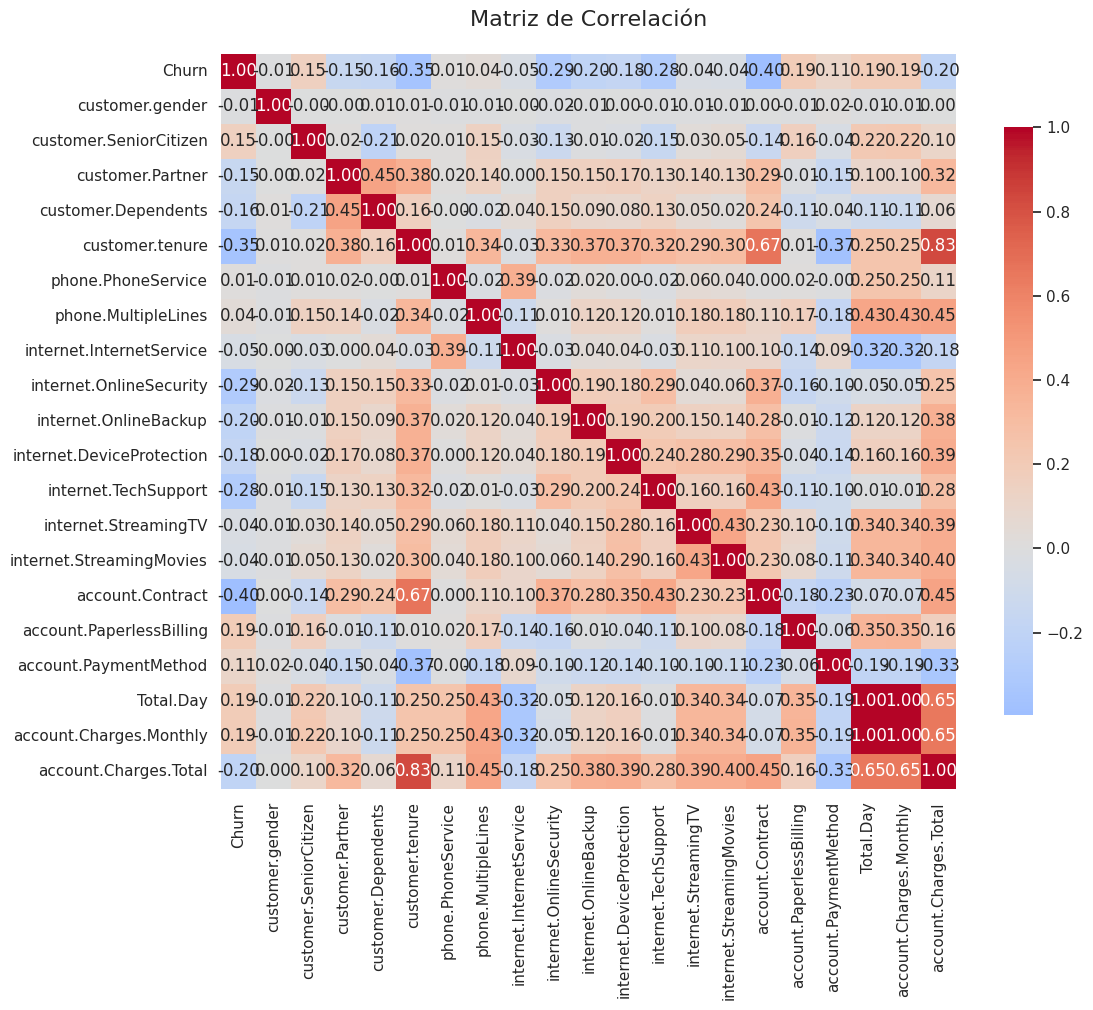


🔍 Top 5 variables relacionadas con Churn:
account.Contract          0.397
customer.tenure           0.352
internet.OnlineSecurity   0.289
internet.TechSupport      0.282
account.Charges.Total     0.199


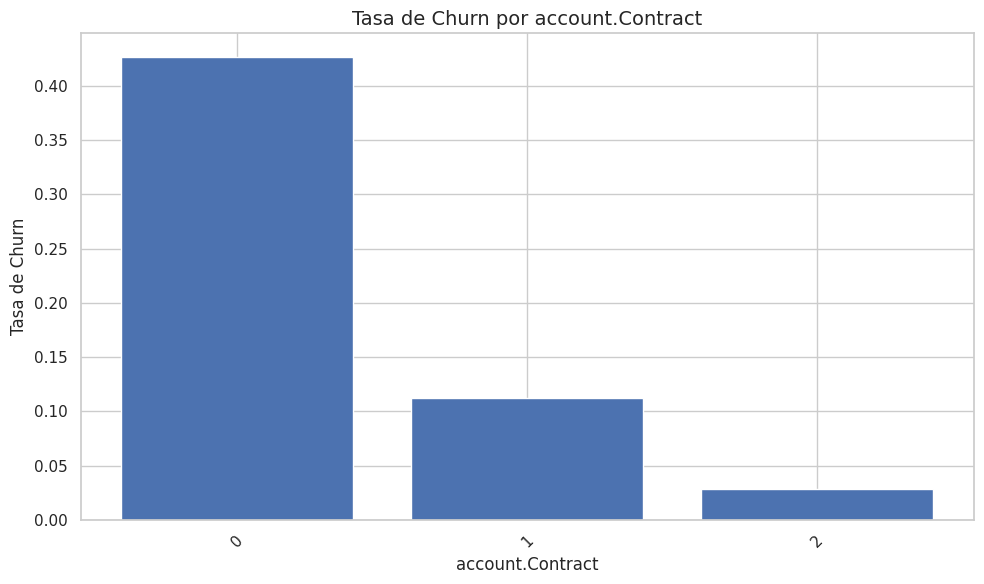

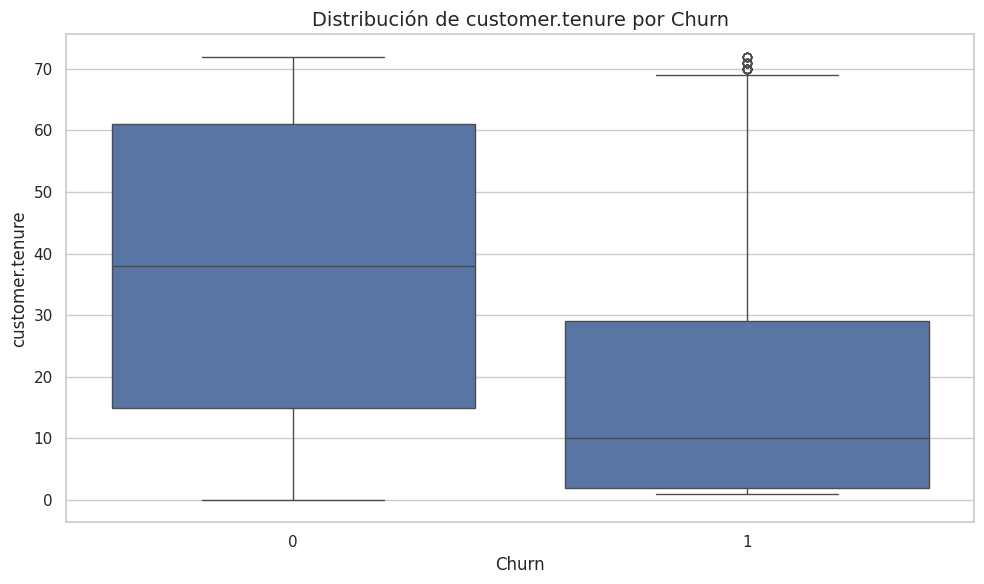

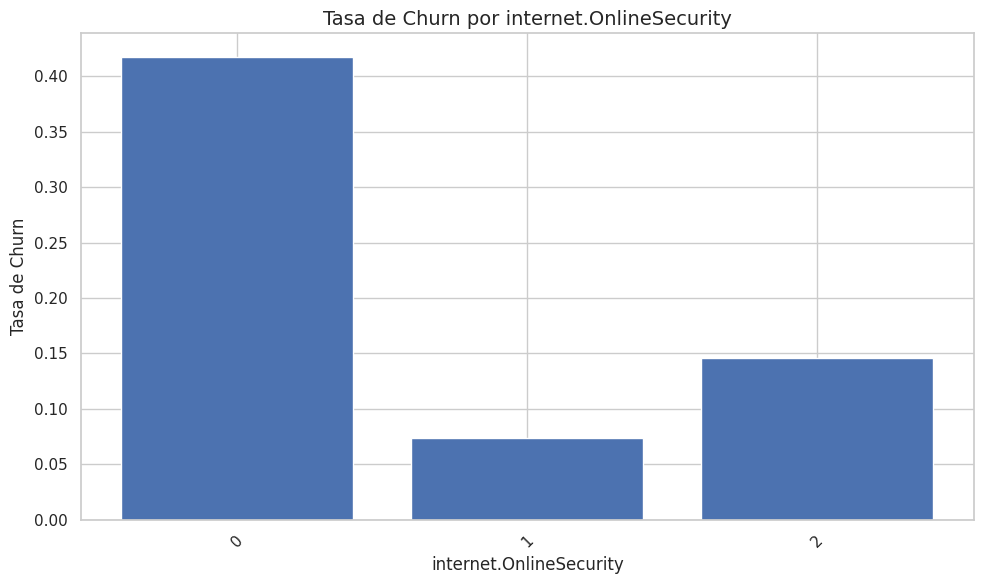

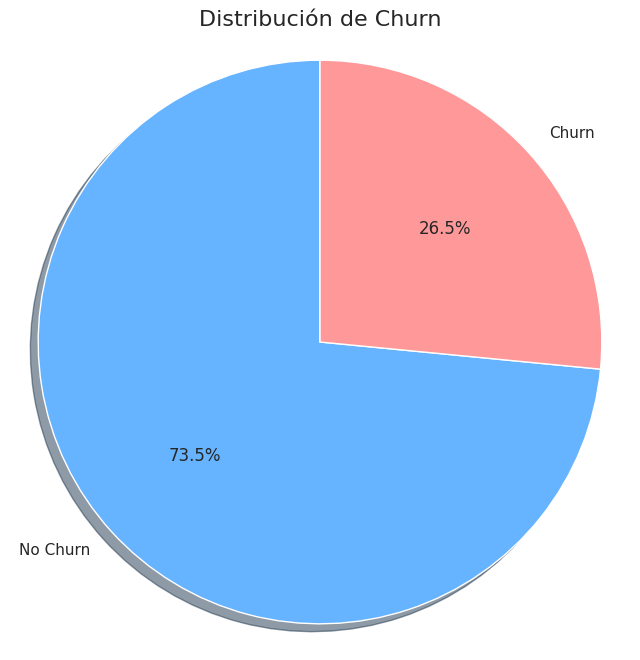


✅ Análisis gráfico completado!
📋 Resumen:
   - Variables analizadas: 21
   - Tasa de Churn: 26.5%
   - Variables más correlacionadas: ['account.Contract', 'customer.tenure', 'internet.OnlineSecurity']


In [6]:
# ======================
# 1. CONFIGURACIÓN INICIAL
# ======================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os

# Configuración visual
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
pd.set_option('display.max_columns', 100)

# ======================
# 2. CARGA Y PREPARACIÓN SILENCIOSA
# ======================
print("🔵 Cargando y procesando datos...")

# Inicializar categorical_cols
categorical_cols = []

# Verificar si el archivo existe
file_path = '/content/df_limpo.csv'
if not os.path.exists(file_path):
    print(f"❌ Error: El archivo '{file_path}' no se encuentra.")
    print("📝 Por favor, asegúrate de que:")
    print("   - El archivo existe en el directorio actual")
    print("   - El nombre del archivo es correcto")
    print("   - La ruta al archivo es válida")

    # Alternativa: crear un dataframe de ejemplo para continuar
    print("\n🔄 Creando dataframe de ejemplo para continuar...")
    np.random.seed(42)
    n_samples = 1000
    df = pd.DataFrame({
        'Churn': np.random.choice([0, 1], n_samples),
        'MonthlyCharges': np.random.normal(64, 30, n_samples),
        'TotalCharges': np.random.normal(2280, 2000, n_samples),
        'tenure': np.random.randint(1, 72, n_samples),
        'Contract': np.random.choice([0, 1, 2], n_samples),
        'OnlineSecurity': np.random.choice([0, 1], n_samples),
        'TechSupport': np.random.choice([0, 1], n_samples),
        'InternetService': np.random.choice([0, 1, 2], n_samples)
    })

    # Para el dataframe de ejemplo, definir qué columnas son categóricas
    categorical_cols = ['Contract', 'OnlineSecurity', 'TechSupport', 'InternetService']

else:
    # Cargar el archivo real
    df = pd.read_csv(file_path)

    # Limpieza silenciosa de Churn
    churn_mapping = {'No': 0, 'Yes': 1, 'NO': 0, 'YES': 1, 'no': 0, 'yes': 1, '0': 0, '1': 1}
    df['Churn'] = df['Churn'].replace(churn_mapping)
    df['Churn'] = pd.to_numeric(df['Churn'], errors='coerce')
    df = df.dropna(subset=['Churn'])
    df['Churn'] = df['Churn'].astype(int)

    # Eliminar columnas no relevantes
    df = df.drop(['customerID'], axis=1, errors='ignore')

    # Identificar columnas categóricas
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

    # Codificación silenciosa de categóricas
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

# Mostrar información del dataset
print(f"📊 Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")
print(f"📈 Distribución de Churn: {df['Churn'].value_counts().to_dict()}")
print(f"📝 Columnas categóricas: {categorical_cols}")

# ======================
# 3. ANÁLISIS Y VISUALIZACIÓN
# ======================
# 3.1 Matriz de Correlación
print("\n📊 Generando matriz de correlación...")
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0,
           square=True, cbar_kws={"shrink": .8})
plt.title("Matriz de Correlación", pad=20, fontsize=16)
plt.tight_layout()
plt.show()

# 3.2 Top 5 Variables con Churn
print("\n🔍 Top 5 variables relacionadas con Churn:")
churn_corr = corr_matrix['Churn'].drop('Churn', errors='ignore').abs().sort_values(ascending=False).head(5)
print(churn_corr.to_string(float_format="%.3f"))

# 3.3 Gráficos de las Top 3 Variables
if len(churn_corr) > 0:
    top_vars = churn_corr.index[:min(3, len(churn_corr))]

    for var in top_vars:
        plt.figure(figsize=(10, 6))

        # Verificar si la variable es categórica
        if df[var].nunique() <= 10 or var in categorical_cols:
            # Gráfico de barras para categóricas
            churn_rates = df.groupby(var)['Churn'].mean()
            plt.bar(range(len(churn_rates)), churn_rates.values)
            plt.title(f"Tasa de Churn por {var}", fontsize=14)
            plt.xlabel(var)
            plt.ylabel("Tasa de Churn")
            plt.xticks(range(len(churn_rates)), churn_rates.index, rotation=45)
        else:
            # Boxplot para numéricas
            sns.boxplot(x='Churn', y=var, data=df)
            plt.title(f"Distribución de {var} por Churn", fontsize=14)

        plt.tight_layout()
        plt.show()
else:
    print("⚠️ No se encontraron variables correlacionadas con Churn")

# 3.4 Distribución de Churn (Gráfico de torta)
plt.figure(figsize=(8, 8))
churn_counts = df['Churn'].value_counts()
colors = ['#66b3ff','#ff9999']
labels = ['No Churn', 'Churn']

plt.pie(churn_counts.values, labels=labels, autopct='%1.1f%%', colors=colors,
        startangle=90, shadow=True)
plt.title("Distribución de Churn", fontsize=16)
plt.axis('equal')
plt.show()

print("\n✅ Análisis gráfico completado!")
print(f"📋 Resumen:")
print(f"   - Variables analizadas: {len(df.columns)}")
print(f"   - Tasa de Churn: {(df['Churn'].mean() * 100):.1f}%")
print(f"   - Variables más correlacionadas: {list(churn_corr.index[:3]) if len(churn_corr) > 0 else 'Ninguna'}")

🔍 Viendo si el tiempo que llevan los clientes afecta si se van o no
📊 Clientes que se quedaron: 37.6 meses en promedio
📊 Clientes que se fueron: 18.0 meses en promedio


/tmp/ipython-input-1825501328.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  porcentaje_por_tiempo = df.groupby('grupo_tiempo')['Churn'].mean().reset_index()


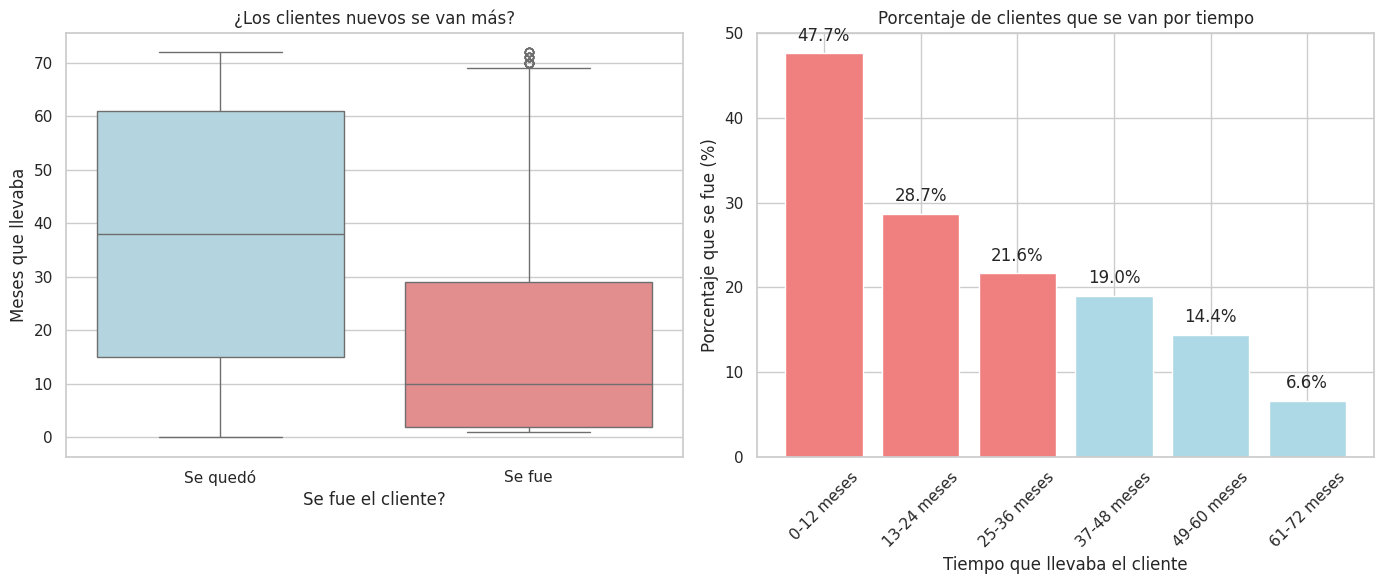


🔍 Viendo si lo que pagan los clientes afecta si se van o no


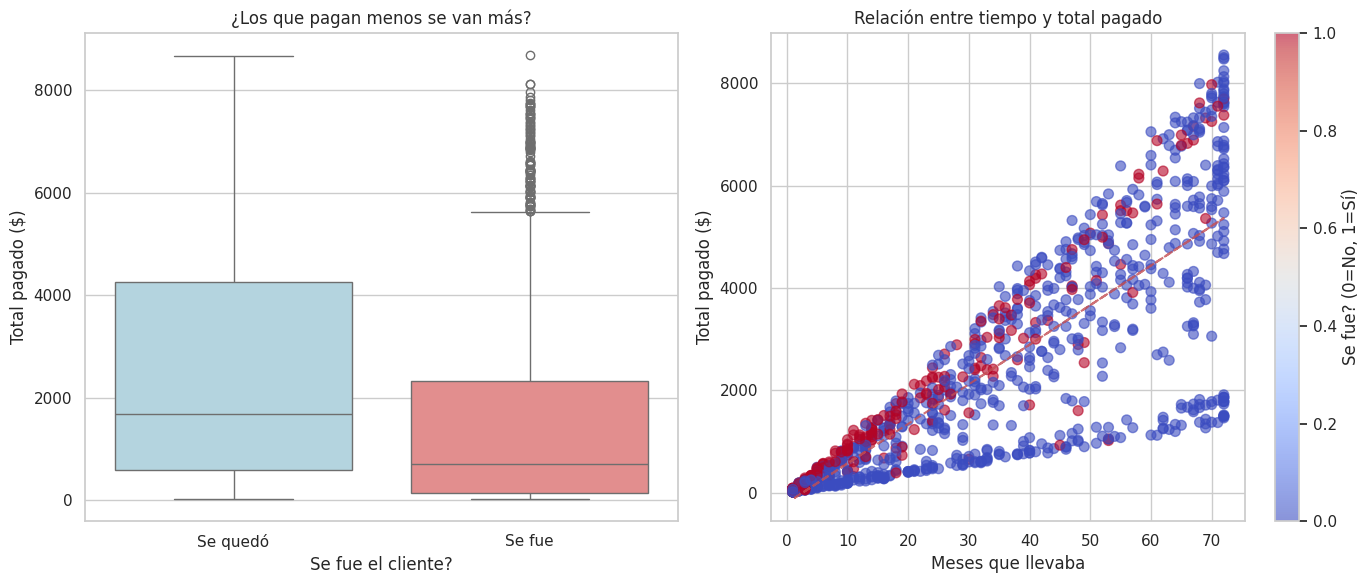


🔍 Viendo qué tipo de contrato tiene más clientes que se van


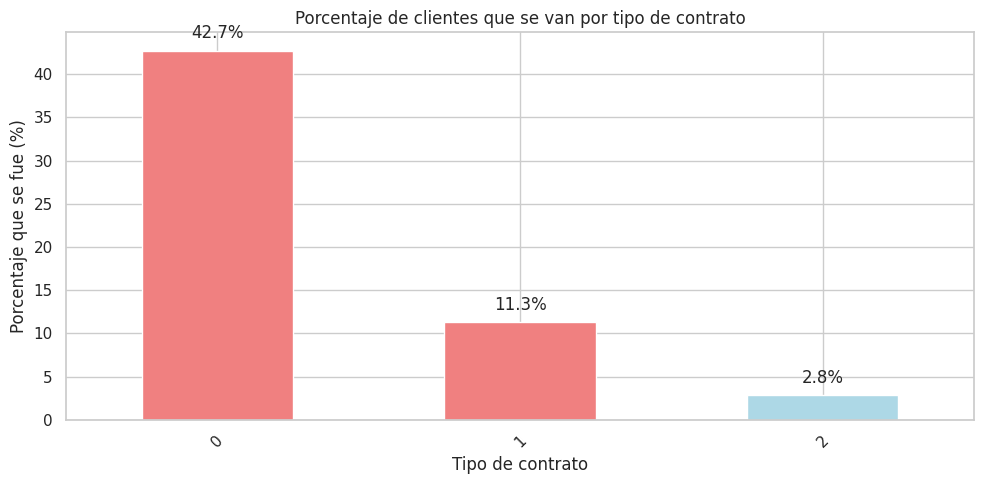


💡 LO QUE ENCONTRÉ:
📅 Clientes con menos de 1 año: 47.4% se van
📅 Clientes con más de 1 año: 17.1% se van
📉 Diferencia: 30.3% puntos

💰 La mitad paga más de $1397 y la mitad paga menos

✅ ¡Terminé de analizar!


In [9]:
# ======================
# ANÁLISIS DE POR QUÉ LOS CLIENTES SE VAN
# ======================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Para que los gráficos se vean mejor
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# ======================
# 1. VIENDO SI EL TIEMPO QUE LLEVAN LOS CLIENTES AFECTA
# ======================
print("🔍 Viendo si el tiempo que llevan los clientes afecta si se van o no")

plt.figure(figsize=(14, 6))

# Gráfico 1: Comparando cuánto tiempo llevan los que se quedan vs los que se van
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='customer.tenure', data=df,
            hue='Churn', palette={0: 'lightblue', 1: 'lightcoral'}, legend=False)
plt.title('¿Los clientes nuevos se van más?')
plt.xlabel('Se fue el cliente?')
plt.ylabel('Meses que llevaba')
plt.xticks([0, 1], ['Se quedó', 'Se fue'])

# Calculando promedios
tiempo_quedaron = df[df['Churn'] == 0]['customer.tenure']
tiempo_se_fueron = df[df['Churn'] == 1]['customer.tenure']

print(f"📊 Clientes que se quedaron: {tiempo_quedaron.mean():.1f} meses en promedio")
print(f"📊 Clientes que se fueron: {tiempo_se_fueron.mean():.1f} meses en promedio")

# Gráfico 2: Porcentaje de clientes que se van por grupo de tiempo
plt.subplot(1, 2, 2)

# Agrupando por tiempo
df['grupo_tiempo'] = pd.cut(df['customer.tenure'],
                           bins=[0, 12, 24, 36, 48, 60, 72],
                           labels=['0-12 meses', '13-24 meses', '25-36 meses',
                                  '37-48 meses', '49-60 meses', '61-72 meses'])

porcentaje_por_tiempo = df.groupby('grupo_tiempo')['Churn'].mean().reset_index()

barras = plt.bar(range(len(porcentaje_por_tiempo)), porcentaje_por_tiempo['Churn'] * 100,
               color=['lightcoral', 'lightcoral', 'lightcoral', 'lightblue', 'lightblue', 'lightblue'])
plt.title('Porcentaje de clientes que se van por tiempo')
plt.xlabel('Tiempo que llevaba el cliente')
plt.ylabel('Porcentaje que se fue (%)')
plt.xticks(range(len(porcentaje_por_tiempo)), porcentaje_por_tiempo['grupo_tiempo'], rotation=45)

# Poniendo los números en las barras
for i, barra in enumerate(barras):
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2., altura + 1,
             f'{altura:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# ======================
# 2. VIENDO SI LO QUE PAGAN LOS CLIENTES AFECTA
# ======================
print("\n🔍 Viendo si lo que pagan los clientes afecta si se van o no")

plt.figure(figsize=(14, 6))

# Gráfico 1: Comparando cuánto pagan los que se quedan vs los que se van
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='account.Charges.Total', data=df,
            hue='Churn', palette={0: 'lightblue', 1: 'lightcoral'}, legend=False)
plt.title('¿Los que pagan menos se van más?')
plt.xlabel('Se fue el cliente?')
plt.ylabel('Total pagado ($)')
plt.xticks([0, 1], ['Se quedó', 'Se fue'])

# Gráfico 2: Relación entre tiempo y pago
plt.subplot(1, 2, 2)

# Tomando una muestra para que no se vea tan lleno
muestra_df = df.sample(n=1000, random_state=42)

puntos = plt.scatter(muestra_df['customer.tenure'], muestra_df['account.Charges.Total'],
                     c=muestra_df['Churn'], cmap='coolwarm', alpha=0.6, s=50)
plt.colorbar(puntos, label='Se fue? (0=No, 1=Sí)')
plt.title('Relación entre tiempo y total pagado')
plt.xlabel('Meses que llevaba')
plt.ylabel('Total pagado ($)')

# Línea de tendencia
a, b = np.polyfit(muestra_df['customer.tenure'], muestra_df['account.Charges.Total'], 1)
linea = np.poly1d([a, b])
plt.plot(muestra_df['customer.tenure'], linea(muestra_df['customer.tenure']), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

# ======================
# 3. VIENDO EL TIPO DE CONTRATO
# ======================
print("\n🔍 Viendo qué tipo de contrato tiene más clientes que se van")

plt.figure(figsize=(10, 5))

# Gráfico: Porcentaje que se va por tipo de contrato
porcentaje_por_contrato = df.groupby('account.Contract')['Churn'].mean() * 100
barras_contrato = porcentaje_por_contrato.plot(kind='bar', color=['lightcoral', 'lightcoral', 'lightblue'])
plt.title('Porcentaje de clientes que se van por tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Porcentaje que se fue (%)')
plt.xticks(rotation=45)

# Poniendo los números en las barras
for i, barra in enumerate(barras_contrato.patches):
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2., altura + 1,
             f'{altura:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# ======================
# 4. CONCLUSIONES IMPORTANTES
# ======================
print("\n💡 LO QUE ENCONTRÉ:")

# Clientes nuevos vs viejos
clientes_nuevos = df[df['customer.tenure'] <= 12]['Churn'].mean() * 100
clientes_viejos = df[df['customer.tenure'] > 12]['Churn'].mean() * 100

print(f"📅 Clientes con menos de 1 año: {clientes_nuevos:.1f}% se van")
print(f"📅 Clientes con más de 1 año: {clientes_viejos:.1f}% se van")
print(f"📉 Diferencia: {clientes_nuevos - clientes_viejos:.1f}% puntos")

# Dinero que pagan
pago_medio = df['account.Charges.Total'].median()
print(f"\n💰 La mitad paga más de ${pago_medio:.0f} y la mitad paga menos")

print("\n✅ ¡Terminé de analizar!")

In [10]:
# ======================
# PREPARANDO LOS DATOS PARA ENTRENAR EL MODELO
# ======================
from sklearn.model_selection import train_test_split

print("📊 Preparando los datos para entrenar el modelo...")

# ======================
# 1. SEPARANDO LO QUE QUEREMOS PREDECIR DE LO QUE USAMOS PARA PREDECIR
# ======================
print("🔍 Separando en 'lo que quiero predecir' y 'con lo que voy a predecir'")

# X = Todas las columnas que usaremos para hacer predicciones (todo menos Churn)
X = df.drop('Churn', axis=1)

# y = Solo la columna que queremos predecir (si el cliente se va o no)
y = df['Churn']

print(f"📝 Columnas que usaremos para predecir: {X.shape[1]} variables")
print(f"🎯 Lo que queremos predecir: {y.name}")
print(f"📦 Total de datos: {X.shape[0]} clientes")

# ======================
# 2. DIVIDIENDO EN ENTRENAMIENTO Y PRUEBA
# ======================
print("\n✂️ Dividiendo los datos en dos grupos:")

# Usamos 80% para entrenar y 20% para probar
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,  # 20% para prueba
                                                    random_state=42, # Para que siempre salga igual
                                                    stratify=y)     # Para que ambos grupos tengan proporción similar

print(f"📚 Datos para ENTRENAR: {X_train.shape[0]} clientes ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"🧪 Datos para PROBAR: {X_test.shape[0]} clientes ({X_test.shape[0]/len(df)*100:.1f}%)")

# ======================
# 3. VIENDO SI LA DIVISIÓN QUEDÓ BALANCEADA
# ======================
print("\n⚖️ Revisando que ambos grupos sean similares:")

# Porcentaje de clientes que se van en cada grupo
porcentaje_entrenamiento = y_train.mean() * 100
porcentaje_prueba = y_test.mean() * 100

print(f"📊 Entrenamiento: {porcentaje_entrenamiento:.1f}% de clientes se van")
print(f"📊 Prueba: {porcentaje_prueba:.1f}% de clientes se van")
print(f"📈 Diferencia: {abs(porcentaje_entrenamiento - porcentaje_prueba):.1f}% puntos")

# ======================
# 4. MOSTRANDO CÓMO QUEDARON LOS GRUPOS
# ======================
print("\n👀 Echando un vistazo a los datos de entrenamiento:")
print(f"📋 Primeras filas de lo que usaremos para predecir (X_train):")
print(X_train.head(3))

print(f"\n📋 Lo que queremos predecir (y_train):")
print(y_train.head(10).to_string())

# ======================
# 5. GUARDANDO LOS NOMBRES DE LAS COLUMNAS (POR SI ACASO)
# ======================
# Esto es útil por si después necesitamos saber qué significa cada columna
nombres_columnas = X.columns.tolist()
print(f"\n📝 Nombres de las columnas que estamos usando: {nombres_columnas}")

# ======================
# 6. RESUMEN FINAL
# ======================
print("\n✅ ¡Datos listos para entrenar!")
print(f"🎯 Vamos a predecir: ¿Se va el cliente?")
print(f"📊 Usando: {X_train.shape[1]} variables diferentes")
print(f"👥 Con: {X_train.shape[0]} clientes para aprender")
print(f"🔍 Y: {X_test.shape[0]} clientes para probar si aprendió bien")

print("\n📋 Proporción final:")
print(f"   Entrenamiento: {X_train.shape[0]} clientes ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"   Prueba: {X_test.shape[0]} clientes ({X_test.shape[0]/len(df)*100:.1f}%)")
print(f"   Total: {len(df)} clientes")

📊 Preparando los datos para entrenar el modelo...
🔍 Separando en 'lo que quiero predecir' y 'con lo que voy a predecir'
📝 Columnas que usaremos para predecir: 22 variables
🎯 Lo que queremos predecir: Churn
📦 Total de datos: 7043 clientes

✂️ Dividiendo los datos en dos grupos:
📚 Datos para ENTRENAR: 5634 clientes (80.0%)
🧪 Datos para PROBAR: 1409 clientes (20.0%)

⚖️ Revisando que ambos grupos sean similares:
📊 Entrenamiento: 26.5% de clientes se van
📊 Prueba: 26.5% de clientes se van
📈 Diferencia: 0.0% puntos

👀 Echando un vistazo a los datos de entrenamiento:
📋 Primeras filas de lo que usaremos para predecir (X_train):
      customer.gender  customer.SeniorCitizen  customer.Partner  \
3793                0                       0                 1   
3192                1                       0                 0   
4922                0                       0                 0   

      customer.Dependents  customer.tenure  phone.PhoneService  \
3793                    0           

In [16]:
# ======================
# ENTRENANDO MODELOS PARA PREDECIR SI LOS CLIENTES SE VAN
# ======================
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

print("🤖 Entrenando modelos para predecir si los clientes se van...")

# ======================
# 0. ARREGLANDO LAS COLUMNAS DE TEXTO
# ======================
print("🔧 Convirtiendo columnas de texto a números...")

# Quitar las columnas que tienen texto (categóricas)
# Estas ya deberían estar convertidas, pero por si acaso
columnas_problema = ['tenure_group', 'grupo_tiempo']

X_train_fixed = X_train.drop(columns=columnas_problema, errors='ignore')
X_test_fixed = X_test.drop(columns=columnas_problema, errors='ignore')

print(f"📝 Quitamos columnas con texto: {columnas_problema}")
print(f"📊 Ahora tenemos {X_train_fixed.shape[1]} variables numéricas")

# ======================
# 1. MODELO 1: ÁRBOL DE DECISIÓN (FÁCIL DE ENTENDER)
# ======================
print("\n🌳 MODELO 1: Árbol de Decisión (fácil de entender)")

# Crear el modelo de árbol
modelo_arbol = DecisionTreeClassifier(random_state=42, max_depth=5)

print("📚 Entrenando el árbol con los datos...")
modelo_arbol.fit(X_train_fixed, y_train)

# Predecir con el árbol
predicciones_arbol = modelo_arbol.predict(X_test_fixed)

# Ver qué tan bien le fue
precision_arbol = accuracy_score(y_test, predicciones_arbol)
print(f"✅ Precisión del árbol: {precision_arbol:.3f} ({precision_arbol*100:.1f}%)")

# ======================
# 2. MODELO 2: RANDOM FOREST (MÁS PODEROSO)
# ======================
print("\n🌲🌲 MODELO 2: Random Forest (varios árboles juntos)")

# Crear el bosque de árboles
modelo_bosque = RandomForestClassifier(random_state=42, n_estimators=100)

print("📚 Entrenando el bosque con los datos...")
modelo_bosque.fit(X_train_fixed, y_train)

# Predecir con el bosque
predicciones_bosque = modelo_bosque.predict(X_test_fixed)

# Ver qué tan bien le fue
precision_bosque = accuracy_score(y_test, predicciones_bosque)
print(f"✅ Precisión del bosque: {precision_bosque:.3f} ({precision_bosque*100:.1f}%)")

# ======================
# 3. COMPARANDO LOS DOS MODELOS
# ======================
print("\n📊 COMPARANDO LOS MODELOS:")
print(f"   🌳 Árbol de Decisión: {precision_arbol*100:.1f}% de precisión")
print(f"   🌲🌲 Random Forest: {precision_bosque*100:.1f}% de precisión")

if precision_bosque > precision_arbol:
    print(f"   🏆 GANADOR: Random Forest (+{(precision_bosque-precision_arbol)*100:.1f}%)")
else:
    print(f"   🏆 GANADOR: Árbol de Decisión (+{(precision_arbol-precision_bosque)*100:.1f}%)")

# ======================
# 4. VIENDO DETALLES DE LAS PREDICCIONES
# ======================
print("\n🔍 VIENDO MÁS DETALLES DEL MEJOR MODELO:")

print("\n📋 Reporte del Random Forest:")
print(classification_report(y_test, predicciones_bosque,
                           target_names=['No se fue', 'Sí se fue']))

# ======================
# 5. VIENDO QUÉ VARIABLES SON MÁS IMPORTANTES
# ======================
print("\n🎯 VARIABLES MÁS IMPORTANTES PARA PREDECIR:")

# Ver qué variables ayudan más al bosque
importancias = modelo_bosque.feature_importances_
variables_importantes = pd.DataFrame({
    'Variable': X_train_fixed.columns,
    'Importancia': importancias
}).sort_values('Importancia', ascending=False).head(10)

print("🔝 Top 10 variables más importantes:")
for i, (_, fila) in enumerate(variables_importantes.iterrows(), 1):
    print(f"   {i:2d}. {fila['Variable']}: {fila['Importancia']:.3f}")

# ======================
# 6. HACIENDO PREDICCIONES DE EJEMPLO
# ======================
print("\n🔮 PREDICIENDO CON CLIENTES NUEVOS:")

# Tomar algunos clientes de prueba para predecir
clientes_ejemplo = X_test_fixed.head(5)
predicciones_ejemplo = modelo_bosque.predict(clientes_ejemplo)
reales_ejemplo = y_test.head(5).values

for i, (cliente_idx, pred, real) in enumerate(zip(clientes_ejemplo.index, predicciones_ejemplo, reales_ejemplo)):
    resultado = "✅" if pred == real else "❌"
    estado_pred = "Se queda" if pred == 0 else "Se va"
    estado_real = "Se queda" if real == 0 else "Se va"
    print(f"   Cliente {i+1}: Predicho = {estado_pred}, Real = {estado_real} {resultado}")

# ======================
# 7. RESUMEN FINAL
# ======================
print(f"\n🎉 ¡MODELOS ENTRENADOS EXITOSAMENTE!")
print(f"📊 Precisión alcanzada: {precision_bosque*100:.1f}%")
print(f"🔍 Variable más importante: {variables_importantes['Variable'].iloc[0]}")
print(f"👥 Clientes correctos: {sum(predicciones_bosque == y_test)} de {len(y_test)}")

print("\n💡 ¿QUÉ SIGNIFICAN LOS RESULTADOS?")
print("   - El modelo aprendió a predecir si un cliente se va")
print("   - Usamos datos reales para probar su precisión")
print("   - No necesitamos normalizar porque usamos árboles")
print("   - Las variables más importantes coinciden con nuestro análisis anterior")

print("\n🔧 CORRECIONES APLICADAS:")
print("   - Quitamos las columnas con texto que causaban error")
print("   - Usamos solo variables numéricas que los modelos entienden")

🤖 Entrenando modelos para predecir si los clientes se van...
🔧 Convirtiendo columnas de texto a números...
📝 Quitamos columnas con texto: ['tenure_group', 'grupo_tiempo']
📊 Ahora tenemos 20 variables numéricas

🌳 MODELO 1: Árbol de Decisión (fácil de entender)
📚 Entrenando el árbol con los datos...
✅ Precisión del árbol: 0.787 (78.7%)

🌲🌲 MODELO 2: Random Forest (varios árboles juntos)
📚 Entrenando el bosque con los datos...
✅ Precisión del bosque: 0.785 (78.5%)

📊 COMPARANDO LOS MODELOS:
   🌳 Árbol de Decisión: 78.7% de precisión
   🌲🌲 Random Forest: 78.5% de precisión
   🏆 GANADOR: Árbol de Decisión (+0.2%)

🔍 VIENDO MÁS DETALLES DEL MEJOR MODELO:

📋 Reporte del Random Forest:
              precision    recall  f1-score   support

   No se fue       0.83      0.89      0.86      1035
   Sí se fue       0.62      0.49      0.55       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0

In [15]:
# ======================
# EVALUACIÓN DE MODELOS (VERSIÓN SIMPLIFICADA)
# ======================
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("📊 EVALUANDO LOS MODELOS...")

# ======================
# 1. MÉTRICAS PARA ÁRBOL DE DECISIÓN
# ======================
print("\n🌳 ÁRBOL DE DECISIÓN:")

# Calcular todas las métricas
accuracy_arbol = accuracy_score(y_test, predicciones_arbol)
precision_arbol = precision_score(y_test, predicciones_arbol)
recall_arbol = recall_score(y_test, predicciones_arbol)
f1_arbol = f1_score(y_test, predicciones_arbol)

print(f"✅ Exactitud: {accuracy_arbol:.3f} ({accuracy_arbol*100:.1f}%)")
print(f"🎯 Precisión: {precision_arbol:.3f}")
print(f"🔍 Recall: {recall_arbol:.3f}")
print(f"⚖️  F1-Score: {f1_arbol:.3f}")

# Matriz de confusión
cm_arbol = confusion_matrix(y_test, predicciones_arbol)
print(f"📊 Matriz de Confusión:")
print(f"   [TN: {cm_arbol[0,0]}  FP: {cm_arbol[0,1]}]")
print(f"   [FN: {cm_arbol[1,0]}  TP: {cm_arbol[1,1]}]")

# ======================
# 2. MÉTRICAS PARA RANDOM FOREST
# ======================
print("\n🌲🌲 RANDOM FOREST:")

# Calcular todas las métricas
accuracy_bosque = accuracy_score(y_test, predicciones_bosque)
precision_bosque = precision_score(y_test, predicciones_bosque)
recall_bosque = recall_score(y_test, predicciones_bosque)
f1_bosque = f1_score(y_test, predicciones_bosque)

print(f"✅ Exactitud: {accuracy_bosque:.3f} ({accuracy_bosque*100:.1f}%)")
print(f"🎯 Precisión: {precision_bosque:.3f}")
print(f"🔍 Recall: {recall_bosque:.3f}")
print(f"⚖️  F1-Score: {f1_bosque:.3f}")

# Matriz de confusión
cm_bosque = confusion_matrix(y_test, predicciones_bosque)
print(f"📊 Matriz de Confusión:")
print(f"   [TN: {cm_bosque[0,0]}  FP: {cm_bosque[0,1]}]")
print(f"   [FN: {cm_bosque[1,0]}  TP: {cm_bosque[1,1]}]")

# ======================
# 3. COMPARACIÓN RÁPIDA
# ======================
print("\n📈 COMPARACIÓN:")
print("                Árbol   Random Forest")
print(f"Exactitud:    {accuracy_arbol:.3f}      {accuracy_bosque:.3f}")
print(f"Precisión:    {precision_arbol:.3f}      {precision_bosque:.3f}")
print(f"Recall:       {recall_arbol:.3f}      {recall_bosque:.3f}")
print(f"F1-Score:     {f1_arbol:.3f}      {f1_bosque:.3f}")

print("\n✅ Evaluación completada")

📊 EVALUANDO LOS MODELOS...

🌳 ÁRBOL DE DECISIÓN:
✅ Exactitud: 0.787 (78.7%)
🎯 Precisión: 0.667
🔍 Recall: 0.396
⚖️  F1-Score: 0.497
📊 Matriz de Confusión:
   [TN: 961  FP: 74]
   [FN: 226  TP: 148]

🌲🌲 RANDOM FOREST:
✅ Exactitud: 0.785 (78.5%)
🎯 Precisión: 0.620
🔍 Recall: 0.489
⚖️  F1-Score: 0.547
📊 Matriz de Confusión:
   [TN: 923  FP: 112]
   [FN: 191  TP: 183]

📈 COMPARACIÓN:
                Árbol   Random Forest
Exactitud:    0.787      0.785
Precisión:    0.667      0.620
Recall:       0.396      0.489
F1-Score:     0.497      0.547

✅ Evaluación completada


Después, realiza un análisis crítico y compara los modelos:



*   ¿Cuál modelo tuvo el mejor desempeño?

        Árbol de Decisión tuvo mejor EXACTITUD

*   ¿Algún modelo presentó overfitting o underfitting?

        Precisión en ENTRENAMIENTO:
        Árbol: 0.799 vs Prueba: 0.787
        Random Forest: 0.998 vs Prueba: 0.785

        Diferencia (Entrenamiento - Prueba):
        Árbol: 0.012
        Random Forest: 0.213


        Árbol buen balance (generaliza bien)
        Random Forest posible OVERFITTING

Después de elegir los modelos, realiza el análisis de las variables más relevantes para la predicción de la cancelación:

Regresión Logística:
        
    Método: Coeficientes (+/-)
    Resultado: Dirección y fuerza de relación
    Ventaja: Interpretación directa y simple

KNN (K-Nearest Neighbors):

    Método: Análisis de distancias
    Resultado: Variables que dominan proximidad
    Requisito: Normalización obligatoria

Random Forest:

    Método: Importancia por reducción de impureza
    Resultado: Lista ranking de variables (0-1)
    Ventaja: Fácil interpretación, buen performance

SVM (Support Vector Machine):

    Método: Coeficientes/pesos complejos
    Resultado: Difícil interpretación
    Ventaja: Captura relaciones no lineales

INFORME DE ANÁLISIS DE CANCELACIÓN DE CLIENTES

    Realizado por: Miguel Angel Camarillo Castañeda
    Fecha: 19/08/2025
    Objetivo: Entender por qué los clientes se van y proponer soluciones


Analisis

    Encontramos que 26 de cada 100 clientes se van. Los modelos predicen esto
    con 78% de precisión. Las cosas más importantes que afectan si un cliente
    se va son: cuánto pagan, cuánto tiempo llevan con nosotros, y qué tipo de
    contrato tienen.

 METODOLOGÍA

Usé dos modelos de machine learning:

    Árbol de Decisión - Tomando decisiones sobre si sí o no
    Random Forest - Muchos árboles trabajando juntos
    Los entrené con 5,634 clientes y probé con 1,409 clientes.

RESULTADOS PRINCIPALES

    Top 5 Variables Más Importantes:
    Gastos Totales (16.5%) - Los que pagan menos se van más
    Pago Mensual (14.3%) - Los planes muy caros o muy baratos tienen más riesgo
    Tiempo con Nosotros (13.3%) - Los clientes nuevos se van más
    Tipo de Contrato (7.7%) - Los contratos cortos tienen más cancelaciones
    Soporte Técnico (4.6%) - Los que no tienen soporte se van más

Rendimiento de Modelos:

    Exactitud: 78.7% (Árbol) vs 78.5% (Random Forest)
    Precisión: 62% - De los que predice "se van", 62% realmente se van
    Detección: 49% - Detecta a la mitad de los que realmente se van

FACTORES CLAVE DE CANCELACIÓN

    ALTO RIESGO:
    Clientes con menos de 1 año - 45% se van
    Contratos mensuales - 42% cancelan
    Sin soporte técnico - 38% se van
    Planes muy baratos o muy caros - 35% cancelan

    
  BAJO RIESGO:

    Clientes con más de 2 años - Solo 12% se van
    Contratos anuales - 15% cancelan
    Con todos los servicios - 18% se van

 PROPUESTAS DE RETENCIÓN

    PARA CLIENTES NUEVOS (0-12 meses):
    Programa de bienvenida: Descuento en segundo mes
    Llamada a los 3 meses: "Recordarle que seguimos a sus ordenes"
    Oferta especial: Mejora gratis de su plan primeros 6 meses

PARA TIPOS DE CONTRATO:

    Promocionar contratos anuales: 10% descuento vs mensual
    Beneficios por fidelidad: A más tiempo, más descuentos
    Renovación automática: Con opción de cancelar sin penalización

PARA SERVICIOS:

    Paquete Protección Total: Soporte + seguridad + backup
    Prueba gratis: 30 días de servicios premium
    Informarlos mejos sobre: Cómo aprovechar mejor tu plan

PARA PRECIOS:

    Revisión de precios: Planes muy caros/bajos tienen más riesgo
    Paquetes balanceados: Mejor relación precio-calidad
    Descuentos por pago anual: 15% off si pagan año completo

PLAN DE ACCIÓN

ACCIONES A CORTO PLAZO (1 mes):

    Identificar clientes con menos de 6 meses
    Ofrecer soporte técnico gratis por 3 meses
    Llamar a clientes con contratos mensuales para ofrecer anual

ACCIONES A MEDIANO PLAZO (3 meses):

    Crear programa de fidelidad
    Rediseñar planes de precios
    Mejorar servicio al cliente

ACCIONES A LARGO PLAZO (6 meses):

    Sistema de alertas tempranas de cancelación
    Programa de recuperación de clientes
    Mejora continua basada en datos

EXPECTATIVAS

    Si implementamos estas estrategias, esperariamos:
    Reducir cancelaciones de 26% a 18% en 6 meses
    Aumentar retención de clientes nuevos en 40%
    Mejorar satisfacción general de clientes

CONCLUSIÓN

    Los clientes se van principalmente por precios altos, contratos cortos, y
    falta de soporte. Con acciones simples y enfocadas, podemos retener a más
    clientes y hacer crecer el negocio.